In [197]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
np.set_printoptions(3)

In [198]:
def flux_vect(u, gamma):
    """ Compute flux vector"""
    f = np.zeros_like(u)

    f[0,:] = u[1,:]
    f[1,:] = (u[1,:]**2/u[0,:]) + (gamma-1)*(u[2,:] - 0.5*(u[1,:]**2/u[0,:]))
    f[2,:] = (u[2,:] + (gamma-1)*(u[2,:] - 0.5*(u[1,:]**2/u[0,:])))*(u[1,:]/u[0,:])
        
    return f

In [199]:
def Richtmyer(u, nt, dt, dx, gamma):
    """Computes the solution with Richtmyer scheme"""
    
    u_star = u.copy()     # predictor
    
    for i in range(nt):
        u_n = u.copy()        # corrector
        f = flux_vect(u_n, gamma)
        u_star[:,:-1] = 0.5*(u_n[:,1:] + u_n[:,:-1]) - (dt/(2*dx))*(f[:,1:]-f[:,:-1])
        f_star = flux_vect(u_star, gamma)
        u[:,1:] = u_n[:,1:] - (dt/dx)*(f_star[:,1:]-f_star[:,:-1])
        
    return u_n

In [200]:
# Initial Parameters

L = 20     # length of shocktube

nx = 81   # number of grid points 
dx = L/(nx-1.)    # grid spacing

x = np.linspace(-10., 10., nx)

gamma = 1.4  # specific heat ratio of air

In [201]:
# Initial state in shock tube

u = np.zeros((3,nx), dtype=float)

# left side parameters
lhs = np.where(x<0.)
u[0,lhs] = 1
u[1,lhs] = 0
u[2,lhs] = 10**5/(gamma-1)

# right side parameters
rhs = np.where(x>=0.)
u[0,rhs] = 0.125
u[1,rhs] = 0
u[2,rhs] = 10**4/(gamma-1)

#print(u[0,rhs])
#print(x[rhs])

In [202]:
sigma = 0.28
dt = sigma*dx/350
nt = int(0.01/dt)
u_n = Richtmyer(u, nt, dt, dx, gamma)

In [203]:
print(nt)

50


In [204]:
print(dt)

0.0002


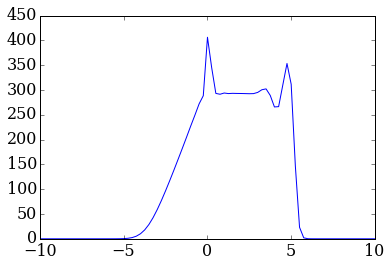

In [205]:
vel = u_n[1,:]/u_n[0,:]
plt.plot(x,vel)

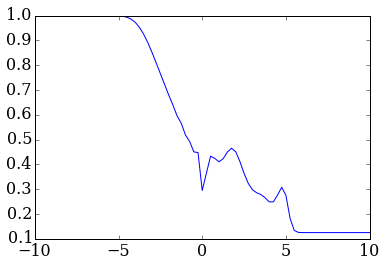

In [206]:
# density
plt.plot(x, u_n[0,:])

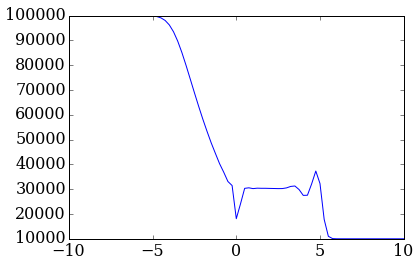

In [207]:
# Pressure

pr = (gamma-1)*(u_n[2,:] - 0.5*(u_n[1,:]**2/u_n[0,:]))
plt.plot(x, pr)

In [208]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx],idx

value = 2.5

val, loc = find_nearest(x, value)
print(x[loc],loc)

2.5 50


In [209]:
# at x = 2.5
vel2 = u[1,loc]/u[0,loc]
p2 = (gamma-1)*(u[2,loc] - 0.5*(u[1,loc]**2/u[0,loc]))
d2 = u[0,loc]

print("@ x=2.5")
print("velocity =", vel2)
print("pressure =", p2)
print("density =", d2)

@ x=2.5
velocity = 292.611471527
pressure = 30250.8901676
density = 0.374691402648
